<h1> ANALYSIS OF K-MEANS ALGORITHM

K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity. The results of the K-means clustering algorithm are:

* The centroids of the K clusters, which can be used to label new data
* Labels for the training data (each data point is assigned to a single cluster)

Rather than defining groups before looking at the data, clustering allows you to find and analyze the groups that have formed organically. The "Choosing K" section below describes how the number of groups can be determined.  



In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
import random
from mpl_toolkits.mplot3d import Axes3D

In [2]:
with open("text.txt", "r") as fd:
    lines = fd.read().splitlines()

In [3]:
p=[]
n = len(lines)
for i in range(0,n):
    s = (lines[i].split())
    p.append(s)

In [4]:
print(p)

[['0.1', '0.4', '0.2'], ['0.6', '0.1', '0.5'], ['0.4', '1.6', '0.9'], ['1.2', '3.4', '6.5'], ['9.2', '9.6', '8.6']]


In [49]:
pts = []
for i in range(0,n):
    r = [float(i) for i in p[i]]
    pts.append(r)
pts    

[[0.1, 0.4, 0.2],
 [0.6, 0.1, 0.5],
 [0.4, 1.6, 0.9],
 [1.2, 3.4, 6.5],
 [9.2, 9.6, 8.6]]

In [6]:
coordinates = [list(i) for i in zip(*pts)]
coordinates

[[0.1, 0.6, 0.4, 1.2, 9.2],
 [0.4, 0.1, 1.6, 3.4, 9.6],
 [0.2, 0.5, 0.9, 6.5, 8.6]]

## Plotting the five points just to visualize it

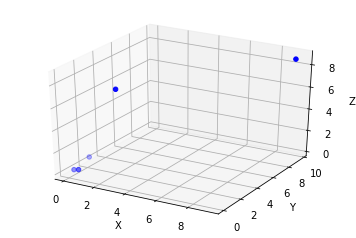

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = coordinates[0]
y = coordinates[1]
z = coordinates[2]

ax.scatter(x, y, z, c='b', marker='o')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


In [450]:
X = np.array(pts)

# CALCULATION USING PREBUILT LIBRARIES

In [451]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print(centroids)
print(labels)

[[ 0.575  1.375  2.025]
 [ 9.2    9.6    8.6  ]]
[0 0 0 0 1]


coordinate: [ 0.1  0.4  0.2] label: 0
coordinate: [ 0.6  0.1  0.5] label: 0
coordinate: [ 0.4  1.6  0.9] label: 0
coordinate: [ 1.2  3.4  6.5] label: 0
coordinate: [ 9.2  9.6  8.6] label: 1


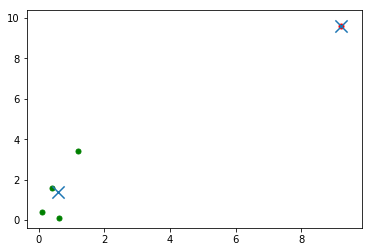

In [448]:
colors = ["g.","r.","c.","y."]
for i in range(len(X)):
    print("coordinate:",X[i], "label:", labels[i])
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)
plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)
plt.show()

# VERIFICATION USING TRADITIONAL CALCULATION

In [366]:
pts

[[0.1, 0.4, 0.2],
 [0.6, 0.1, 0.5],
 [0.4, 1.6, 0.9],
 [1.2, 3.4, 6.5],
 [9.2, 9.6, 8.6]]

In [57]:
coor = np.array(pts)

## Randomly define k centroids

In [274]:
k = 2 #defined by the user
cen = []
for i in range(0,k):
    c = random.choice(pts)
    cen.append(c)
cen = np.array(cen)
cen

array([[ 0.6,  0.1,  0.5],
       [ 9.2,  9.6,  8.6]])

## Calculate the distance to each point from the centroids

In [249]:
a=[]
b=[]
for i in range(0,n):
    for j in range(0,k):
        dist = np.linalg.norm(cen[j]-coor[i])
        a.append(dist)
        clus = a.index(min(a))
        b.append(clus)

In [271]:
k #number of points

2

## Function to split array based on the number of clusters k

In [307]:
def split(arr, size):
     arrs = []
     while len(arr) > size:
         pice = arr[:size]
         arrs.append(pice)
         arr   = arr[size:]
     arrs.append(arr)
     return arrs

In [312]:
a=[]
b=[]
for i in range(0,n):
    for j in range(0,k):
        dist = np.linalg.norm(cen[j]-coor[i])
        a.append(dist)
b = split(a, 2)

## Distance of the five points from the two randomly defined centroid

In [325]:
b

[[0.65574385243020006, 15.427572718998929],
 [0.0, 15.159815302304972],
 [1.5652475842498528, 14.16792151305194],
 [6.8738635424337602, 10.336827366266691],
 [15.159815302304972, 0.0]]

In [361]:
dic = {}
for i in range(0,5):
    ll = b[i].index(min(b[i]))
    dic[i] = ll

In [362]:
dic

{0: 0, 1: 0, 2: 0, 3: 0, 4: 1}

In [390]:
clusters = list(dic.values())
values = np.array(clusters)

In [371]:
n

5

In [395]:
ss=[]
for i in range(0,k):
    searchval = i
    ii = np.where(values == searchval)[0]
    ss.append(ii)
ss

[array([0, 1, 2, 3], dtype=int64), array([4], dtype=int64)]

In [421]:
cluster1 = [pts[0],pts[1],pts[2],pts[3]]
cluster2 = [pts[4]]

In [445]:
cluster1
coo1 = [list(i) for i in zip(*cluster1)]
centroid1 = [sum(coo1[i])/len(coo1[i]) for i in range(0,len(coo1))]
coo2 = [list(i) for i in zip(*cluster2)]
centroid2 = [sum(coo2[i])/len(coo2[i]) for i in range(0,len(coo2))]

## CENTROID OBTAINED BY NORMAL CALCULATION

In [479]:
centroid = [centroid1,centroid2]
centroid = np.array(centroid)
centroid

array([[ 0.575,  1.375,  2.025],
       [ 9.2  ,  9.6  ,  8.6  ]])

#### Even after several iterations the centroid value does not change indicating that it is the correct centroid estimation

In [482]:
np.savetxt("centroid.txt", centroid ,delimiter='\t')

# OUR METHOD IS CORRECT 